# Building Artificial Neural Network

- MNIST Dataset


### Step 1: Import the necessary libraries


In [55]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### Step 2: Load and preprocess the MNIST dataset from mnist.csv


In [56]:
mnist_df = pd.read_csv(r'D:\Project\Python\Class\bia_dl\ANN_AND_CNN\ANN\mnist.csv')

In [57]:
mnist_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# Split the dataset into features (pixels) and labels (target)

features = mnist_df.drop('label', axis=1)
labels = mnist_df['label']

In [59]:
# Normalize pixel values to be in the range [0, 1]

features = features / 255.0

In [60]:
# Convert features and labels to NumPy arrays

features = np.array(features)
labels = np.array(labels)

In [61]:
# Reshape the features to match the expected input shape

features = features.reshape(-1, 28, 28)

In [62]:
# Reshape the labels to be one-dimensional

labels = labels.reshape(-1)

### Step 3: Build the ANN model


In [63]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D array
    keras.layers.Dense(128, activation='relu'),   # Fully connected layer with 128 neurons and ReLU activation
    keras.layers.Dropout(0.2),                   # Dropout layer to prevent overfitting
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 0-9 digits) and softmax activation
])

# Step 4: Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',  # Cross-entropy loss for classification
#               metrics=['accuracy'])

c:\Users\jay\anaconda3\envs\bia\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Step 4: Compile the model


In [64]:
# model.compile(optimizer='adam', #sgd  
#               loss='sparse_categorical_crossentropy',  # Cross-entropy loss for classification
#               metrics=['accuracy'])

In [65]:
model.compile(optimizer='sgd', #sgd  
              loss='sparse_categorical_crossentropy',  # Cross-entropy loss for classification
              metrics=['accuracy'])

### Step 5: Train the model


In [66]:
model.fit(features, labels, epochs = 10)  # You can adjust the number of epochs

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6500 - loss: 1.2494
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8706 - loss: 0.4560
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8944 - loss: 0.3706
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9084 - loss: 0.3253
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9176 - loss: 0.2950
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9249 - loss: 0.2688
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9287 - loss: 0.2552
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9317 - loss: 0.2389
Epoch 9/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9359 - loss: 0.2287
Epoch 10/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9427 - loss: 0.2097


### Step 6: Make predictions


In [67]:
predictions = model.predict(features)  # Use the same dataset for predictions (not recommended for real-world use)

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


### Step 7: Visualize the results


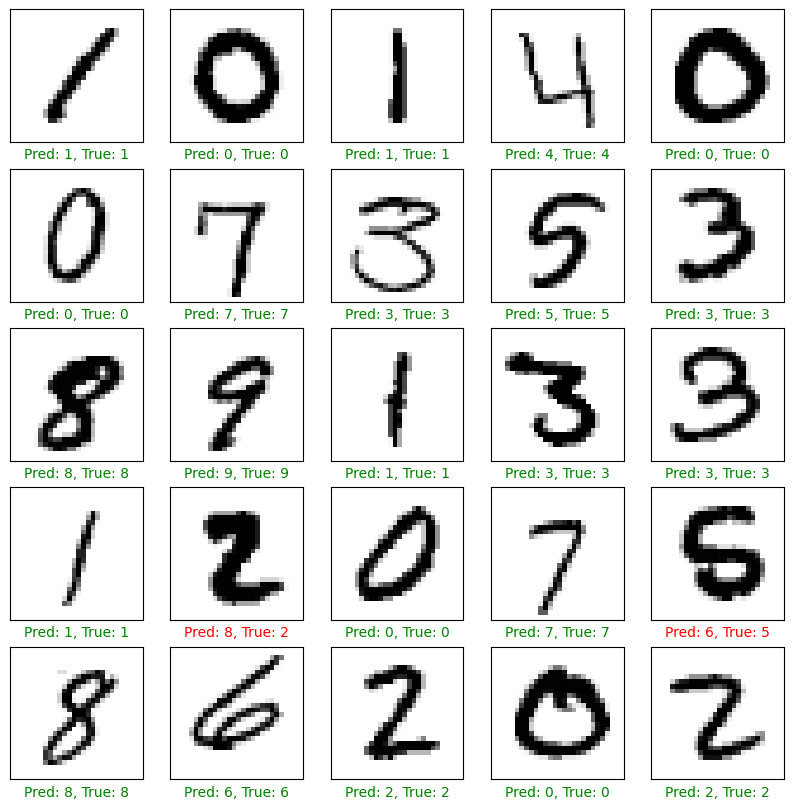

In [68]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(features[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Pred: {predicted_label}, True: {true_label}", color=color)
plt.show()